In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/ourcodingclub/CC-python-pandas-matplotlib/master/scottish_hills.csv"
dataframe = pd.read_csv(url)
print(dataframe.head(10))

                    Hill Name  Height   Latitude  Longitude    Osgrid
0       A' Bhuidheanach Bheag   936.0  56.870342  -4.199001  NN660775
1               A' Chailleach   997.0  57.693800  -5.128715  NH136714
2               A' Chailleach   929.2  57.109564  -4.179285  NH681041
3  A' Chraileag (A' Chralaig)  1120.0  57.184186  -5.154837  NH094147
4             A' Ghlas-bheinn   918.0  57.255090  -5.303687  NH008231
5               A' Mhaighdean   967.0  57.719644  -5.346720  NH007749
6              A' Mharconaich   973.2  56.857002  -4.290668  NN604762
7                  Am Basteir   934.0  57.247931  -6.202982  NG465253
8                   Am Bodach  1031.8  56.741727  -4.983393  NN176650
9               Am Faochagach   953.0  57.771801  -4.853899  NH303793


In [26]:
sorted_hills = dataframe.sort_values(by=['Height'], ascending = False)
print(sorted_hills.head(5))

                       Hill Name  Height   Latitude  Longitude    Osgrid
92                     Ben Nevis  1344.5  56.796891  -5.003675  NN166712
88   Ben Macdui (Beinn Macduibh)  1309.0  57.070368  -3.669099  NN988989
104                    Braeriach  1296.0  57.078298  -3.728389  NN953999
115                   Cairn Toul  1291.0  57.054397  -3.710773  NN963972
212        Sgor an Lochain Uaine  1258.0  57.058369  -3.725797  NN954976


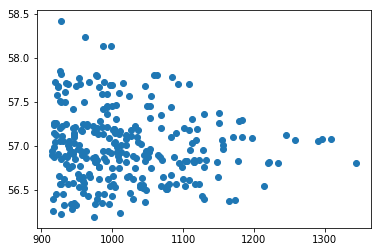

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
x = dataframe.Height
y = dataframe.Latitude
z = dataframe.Longitude
plt.scatter(x,y)
plt.savefig("scottish_scatter_plot.png")

rvalue: -0.0865428167705
pvalue: 0.147179342824


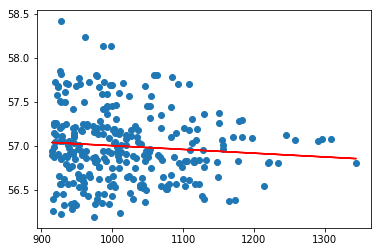

In [14]:
from scipy.stats import linregress
stats = linregress(x,y)

m = stats.slope
b = stats.intercept

plt.scatter(x,y)
plt.plot(x, m * x + b, color="red")
print("rvalue: " + str(stats.rvalue))
print("pvalue: " + str(stats.pvalue))

(array([ 56. ,  56.5,  57. ,  57.5,  58. ,  58.5,  59. ]),
 <a list of 7 Text yticklabel objects>)

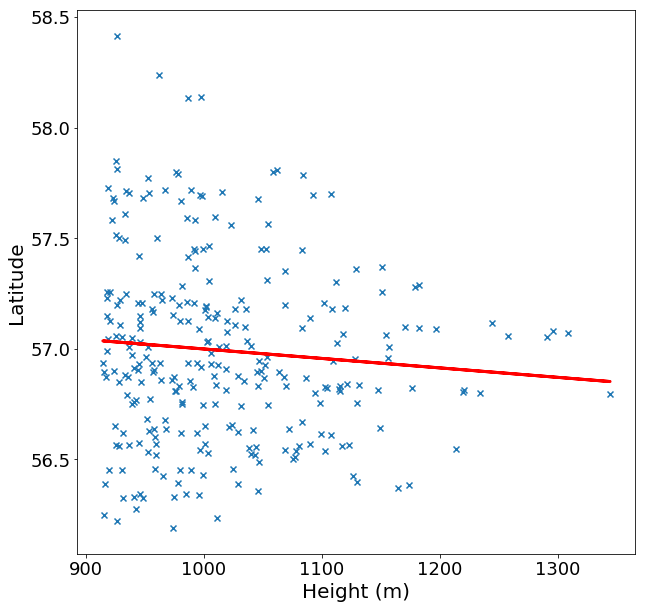

In [23]:
# Change the default figure size
plt.figure(figsize=(10,10))

# Change the default marker for the scatter from circles to x's
plt.scatter(x, y, marker='x')

# Set the linewidth on the regression line to 3px
plt.plot(x, m * x + b, color="red", linewidth=3)

# Add x and y labels, and set their font size
plt.xlabel("Height (m)", fontsize=20)
plt.ylabel("Latitude", fontsize=20)

# Set the font size of the number labels on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


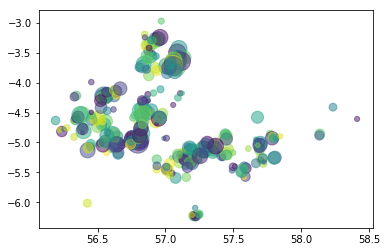

In [24]:
import numpy as np
# generates a different color for each different mountain
colors = np.random.random(len(y))
# y = Latitude, z = Longitutde, s = 
plt.scatter(y, z, s = (x-900), c=colors, alpha=0.5)

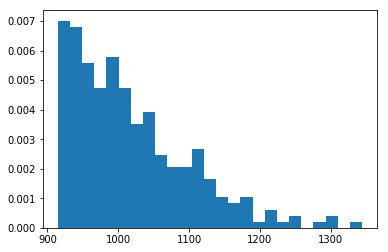

In [31]:
# Histograms
# bins separates the latitude in 25 discrete categories
# density will normalize the data to 1
# if you get an error, use density instead of normed
plt.hist(x, bins=25, density=True)
plt.savefig("histogram.png", dpi=250)

Text(0.5,0,'Height')

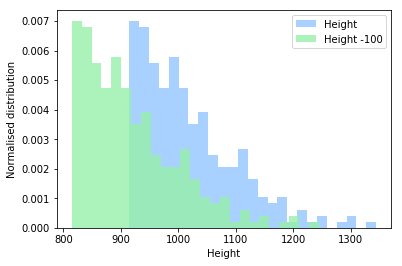

In [38]:
import numpy as np
# using a stylesheet
plt.style.use("seaborn-pastel")
shifted_x = x - 100
fig, ax = plt.subplots()
ax.hist(x, bins=25, density=True, histtype='stepfilled', alpha=0.8, label='Height')
ax.hist(shifted_x, bins=25, density=True, histtype='stepfilled', alpha=0.8, label='Height -100')
ax.legend(prop={'size': 10})

ax.set_ylabel('Normalised distribution')
ax.set_xlabel('Height')

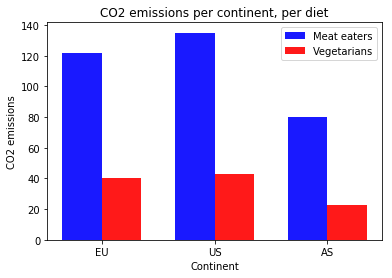

In [54]:
# Bar charts
labels = ['EU', 'US', 'AS']

meateaters = [122, 135, 80]
vegetarians = [40, 43, 23]

index = np.arange(len(labels))

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.9

# Plot rectangular bars where number of bars is the length of labels
rects1 = ax.bar(index, meateaters, bar_width, alpha=opacity, color='b', label='Meat eaters')
rects2 = ax.bar(index + bar_width, vegetarians, bar_width, alpha=opacity, color='r', label='Vegetarians')

ax.set_xlabel('Continent')
ax.set_ylabel('CO2 emissions')
ax.set_title('CO2 emissions per continent, per diet')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

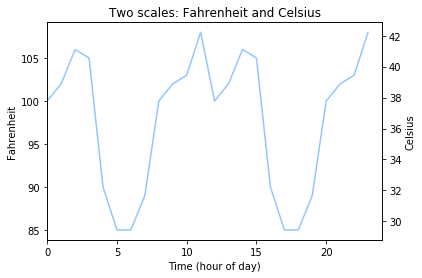

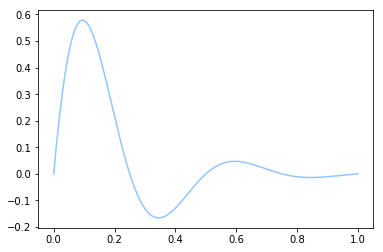

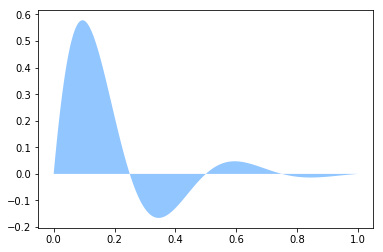

In [74]:
# Line plots
# returns temperature in Celsius
def fahrenheit2celsius(temp):
    return (5.0/9.0) * (temp - 32)
# Temperature values
temperature = [100, 102, 106, 105, 90, 85, 85, 89, 100, 102, 103, 108, 100, 102, 106, 105, 90, 85, 85, 89, 100, 102, 103, 108]

fig, ax_f = plt.subplots()
# twinx to get a second set of axes to plot temperature evolution using both C and F
ax_c = ax_f.twinx()

#plot data
ax_f.plot(temperature)

# x-axis shows 24 hours
ax_f.set_xlim(0, 24)

# set the axis limits
y1, y2 = ax_f.get_ylim()
ax_c.set_ylim(fahrenheit2celsius(y1), fahrenheit2celsius(y2))
ax_c.figure.canvas.draw()

# change some axis labels
ax_f.set_title('Two scales: Fahrenheit and Celsius')
ax_f.set_ylabel('Fahrenheit')
ax_c.set_ylabel('Celsius')
ax_f.set_xlabel('Time (hour of day)')

# sample 500 X's between 0 and 1
newx = np.linspace(0,1,500)
# formula for graph
newy = np.sin(4 * np.pi * newx) * np.exp(-5 * newx)

# plt.subplots() lets us access the axis and plot separately
fig, ax = plt.subplots()
ax.plot(newx, newy)

# using the fill command
fig, ax = plt.subplots()
ax.fill(newx, newy)

Text(0.5,1,'Logarithmic')

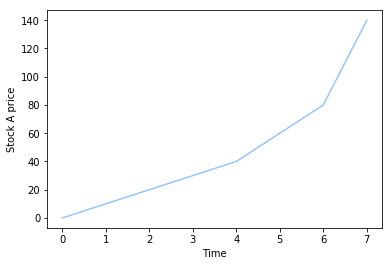

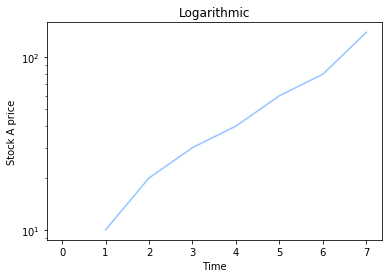

In [84]:
# Axis label affecting how we perceive data
# growth of stock A
stockA = [0, 10, 20, 30, 40, 60, 80,140]
plt.plot(stockA)
plt.xlabel('Time')
plt.ylabel('Stock A price')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line = ax.plot(stockA)
ax.set_yscale('log')
plt.xlabel('Time')
plt.ylabel('Stock A price')
ax.set_title('Logarithmic')

{'boxes': [<matplotlib.lines.Line2D at 0x1b8d76ae9b0>],
 'caps': [<matplotlib.lines.Line2D at 0x1b8d6515470>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b8d65a9f28>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1b8d65a9cf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1b8d76ae748>,
  <matplotlib.lines.Line2D at 0x1b8d6515780>]}

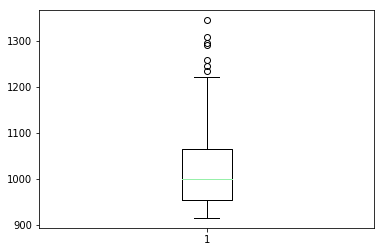

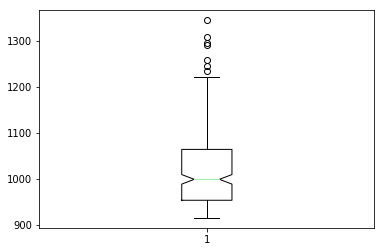

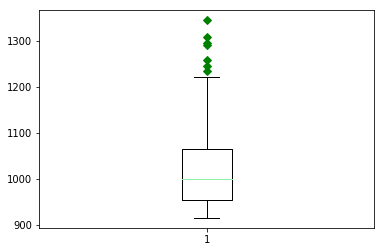

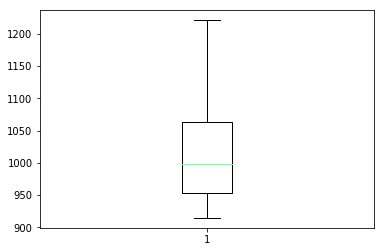

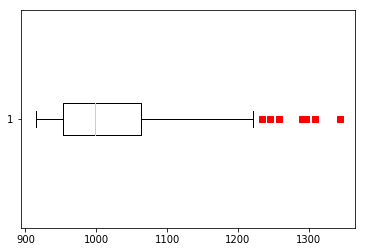

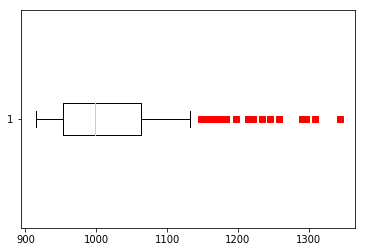

In [91]:
# Boxplots
plt.boxplot(x)

# notched plot
plt.figure()
plt.boxplot(x,1)

# change outlier point symbols
plt.figure()
plt.boxplot(x, 0, 'gD')

# don't show outlier points
plt.figure()
plt.boxplot(x, 0, '')

# horizontal boxes
plt.figure()
plt.boxplot(x, 0, 'rs', 0)

# change whisker length
plt.figure()
plt.boxplot(x, 0, 'rs', 0, 0.75)

       School  Women  Men  Gap
0         MIT     94  152   58
1    Stanford     96  151   55
2     Harvard    112  165   53
3      U.Penn     92  141   49
4   Princeton     90  137   47
5     Chicago     78  118   40
6  Georgetown     94  131   37
7       Tufts     76  112   36
8        Yale     79  114   35
9    Columbia     86  119   33


Text(0.5,0,'Salary')

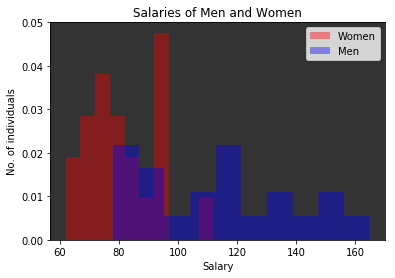

In [109]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv"
dataframe = pd.read_csv(url)
print(dataframe.head(10))

import numpy as np
# using a stylesheet
plt.style.use("seaborn-pastel")
w = dataframe.Women
m = dataframe.Men
fig, ax = plt.subplots()
ax.hist(w, bins=10, density=True, histtype='stepfilled', alpha=0.4, label='Women', color='r')
ax.hist(m, bins=10, density=True, histtype='stepfilled', alpha=0.4, label='Men', color='b')
ax.legend(prop={'size': 10})

ax.set_facecolor((0.2, 0.2, 0.2))
ax.set_title('Salaries of Men and Women')
ax.set_ylabel('No. of individuals')
ax.set_xlabel('Salary')

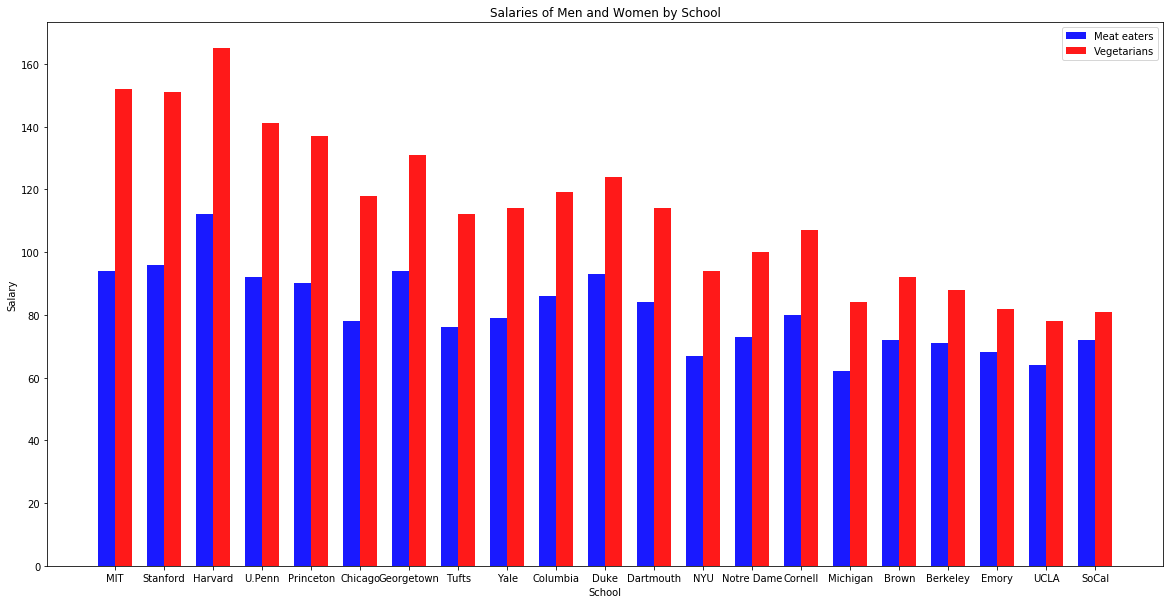

In [115]:
# Bar charts
labels = dataframe.School
index = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(20,10))

bar_width = 0.35
opacity = 0.9

# Plot rectangular bars where number of bars is the length of labels
rects1 = ax.bar(index, w, bar_width, alpha=opacity, color='b', label='Meat eaters')
rects2 = ax.bar(index + bar_width, m, bar_width, alpha=opacity, color='r', label='Vegetarians')

ax.set_xlabel('School')
ax.set_ylabel('Salary')
ax.set_title('Salaries of Men and Women by School')
ax.legend(prop={'size': 5})

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

{'boxes': [<matplotlib.lines.Line2D at 0x1b8dc35f208>,
 'caps': [<matplotlib.lines.Line2D at 0x1b8dc3749b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b8dc359c18>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1b8dc374748>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1b8dc35f748>,
  <matplotlib.lines.Line2D at 0x1b8dc34ffd0>]}

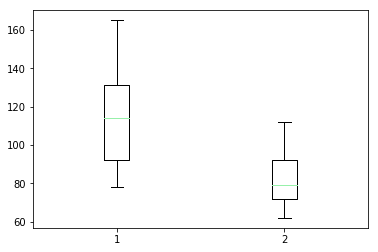

In [124]:
# Boxplot: Men/Women salary
plt.figure()
plt.boxplot([m,w], 0, 'gD', 0.75)